In [72]:
print(__doc__)

# Code source adapted from: Jaques Grobler
# License: BSD 3 clause

import random
import matplotlib.pyplot as plt
import numpy as np
import pandas
import os
import csv
import time
from tqdm import tqdm
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import normalize

import pprint

pp = pprint.PrettyPrinter(indent=4)

Automatically created module for IPython interactive environment


In [73]:
def graph_add_scatter(x, y, c='black'):
    plt.scatter(x, y, color= c)

def graph_add_line(x, y, c='black'):
    plt.plot(x, y, color=c, linewidth=3)

def plot(name=""):
    plt.xticks()
    plt.yticks()
    
    if name!="":
        plt.savefig(name)
    plt.show()
    plt.close()

def GetGroup(labels, group):
    indexes = []
    for i in range(len(labels)):
        if labels[i] == group:
            indexes.append(i)
    return indexes

class DataReader():
    def __init__(self, file_path="health-dataset/health.txt"):
        f = open(file_path)
        self.lines = []
        for i, line in enumerate(f):
            self.lines.append(line)
    
    def GetLine(self, line):
        if line+1 < 0 and line+1 >= len(self.lines):
            return str(line) + " Is Not a Valid Line"
        return self.lines[line+1]
    
    def GetLineGroup(self, lines):
        t = []
        for i in range(len(lines)):
            t.append(self.GetLine(lines[i]))
        return t

data_reader = DataReader()

# Read Dataset

In [77]:
# Read and treat training dataset
dataset = pandas.read_csv('health-dataset/word2vec.csv').values
# dataset = (dataset-dataset.max()/2) / dataset.max()
dataset = normalize(dataset)
data_train = dataset[0:10000,:]
data_validation = dataset[10000:13227,:]

# dataset = load_digits(n_class=10)

# K-Means Algorithm

In [83]:
kmeans_costs = []
kmeans_clusters = []
kmeans_silhouette = []
kmeans_davies = []
for n in range(10,100,10):
    print("Training KMeans for " + str(n) + " clusters")
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(data_train)
    
    
    labels = kmeans.predict(data_validation)
    s = silhouette_score(data_validation,labels)
    d = davies_bouldin_score(data_validation,labels)
    print("\t\t Cost: " + str(kmeans.inertia_))
    print("\t\t Silhouette Score: " + str(s))
    print("\t\t Davies Bouldin Score: " + str(d))
    
    kmeans_costs.append(kmeans.inertia_)
    kmeans_clusters.append(n)
    kmeans_silhouette.append(s)
    kmeans_davies.append(d)
    
for n in range(100,2001,100):
    print("Training KMeans for " + str(n) + " clusters")
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(data_train)
    
    labels = kmeans.predict(data_validation)
    s = silhouette_score(data_validation,labels)
    d = davies_bouldin_score(data_validation,labels)
    print("\t\t Cost: " + str(kmeans.inertia_))
    print("\t\t Silhouette Score: " + str(s))
    print("\t\t Davies Bouldin Score: " + str(d))
    
    kmeans_costs.append(kmeans.inertia_)
    kmeans_clusters.append(n)
    kmeans_silhouette.append(s)
    kmeans_davies.append(d)

Training KMeans for 10 clusters
		 Cost: 3864.823008722847
		 Silhouette Score: -0.005301908341068207
		 Davies Bouldin Score: 4.672879248677097
Training KMeans for 20 clusters
		 Cost: 3730.9561033134505
		 Silhouette Score: 0.005127809287089654
		 Davies Bouldin Score: 4.610440710811416
Training KMeans for 30 clusters
		 Cost: 3637.7699136728806
		 Silhouette Score: 0.005613148137485453
		 Davies Bouldin Score: 4.137640820343724
Training KMeans for 40 clusters
		 Cost: 3571.593182067949
		 Silhouette Score: -0.0013651600566107237
		 Davies Bouldin Score: 4.210157325085603
Training KMeans for 50 clusters
		 Cost: 3518.8173538013198
		 Silhouette Score: -0.00452528578240937
		 Davies Bouldin Score: 3.960719159116425
Training KMeans for 60 clusters
		 Cost: 3476.7865024670355
		 Silhouette Score: -0.004110911763772853
		 Davies Bouldin Score: 3.7450084058324853
Training KMeans for 70 clusters
		 Cost: 3447.297771901901
		 Silhouette Score: -0.009763766293263788
		 Davies Bouldin Score: 

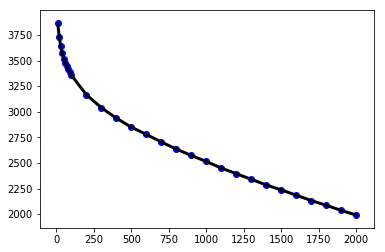

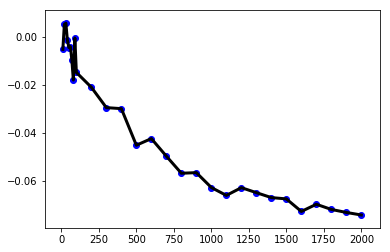

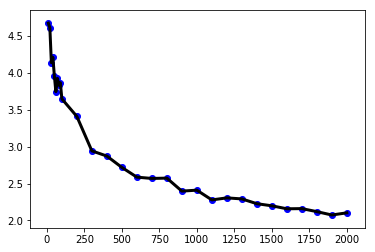

In [85]:
graph_add_line(kmeans_clusters, kmeans_costs)
graph_add_scatter(kmeans_clusters, kmeans_costs,c='blue')
plot("cost_nclusters_10_2000")

graph_add_line(kmeans_clusters, kmeans_silhouette)
graph_add_scatter(kmeans_clusters, kmeans_silhouette,c='blue')
plot("silhouette_nclusters_10_2000")

graph_add_line(kmeans_clusters, kmeans_davies)
graph_add_scatter(kmeans_clusters, kmeans_davies,c='blue')
plot("davies_nclusters_10_2000")

## Getting Clusters

Here we get the tweets using kmeans with 100 and 2000 clusters to compare

In [86]:
kmeans_100 = KMeans(n_clusters=100)
kmeans_100.fit(data_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [87]:
labels = kmeans_100.predict(data_validation)
s100 = silhouette_score(data_validation,labels)
print("Silhouette Score for 100 Clusters is: " + str(s100))
d100 = davies_bouldin_score(data_validation,labels)
print("Davies Bouldin Score for 100 Clusters is: " + str(d100))

for i in range(100):
    print("Group " + str(i) + "\n\n")
    pp.pprint(data_reader.GetLineGroup(GetGroup(labels,i)))

Silhouette Score for 80 Clusters is: -0.03952158828767532
Davies Bouldin Score for 80 Clusters is: 3.610167513426738
Group 0


[   '576464606551490560|Fri Mar 13 19:27:27 +0000 2015|CDC: Misuse of garments may have led to release of bioterror bacteria at Tulane monkey lab.\n',
    '573959676129316864|Fri Mar 06 21:33:45 +0000 2015|College kids make robotic arms for children without real ones\n',
    '563830327970643968|Fri Feb 06 22:43:20 +0000 2015|CNN: Flu epidemic seems to be slowing, but 8 more children have died @jechristensen\n',
    "507978649220689920|Fri Sep 05 19:48:42 +0000 2014|Pilots of wayward plane may have suffered from cerebral hypoxia. Here's what that is:\n",
    '503873669631070208|Mon Aug 25 11:56:59 +0000 2014|DR Congo confirms #Ebola cases as deadly virus spreads:\n',
    '497419469069639680|Thu Aug 07 16:30:17 +0000 2014|Ready for lunch? Eating out costs you about 200 extra calories\n',
    '496445791842488321|Tue Aug 05 00:01:14 +0000 2014|"Big Ben" lost 145 lb

    '334908116053422080|Thu May 16 05:48:11 +0000 2013|Getting back at your ex ... with surgery\n']
Group 16


[   '571438753413259264|Fri Feb 27 22:36:30 +0000 2015|Ophthalmologists say the gold v blue dress could help find new vision treatments. #thedress @elizcohencnn\n',
    "540284396092526592|Wed Dec 03 23:20:12 +0000 2014|We don't all have these good genes, here's the diet you can do that may lead to a long life  \n",
    "525384710461984768|Thu Oct 23 20:34:10 +0000 2014|.@ClairityProject spends a lot of time in the hospital so she's made it home:\n",
    "524954255837638656|Wed Oct 22 16:03:42 +0000 2014|Bently the dog has tested negative for #Ebola #Dallas city officials say. He's still in quarantine\n",
    '517388307454779392|Wed Oct 01 18:59:19 +0000 2014|.@_wonderbeagle Both! Sweat, saliva, semen... basically any fluid that comes from your body. For more:\n',
    '516672523350859776|Mon Sep 29 19:35:03 +0000 2014|RT @MobilityMaker: Check out @cnnhealth for my 5 simple #yo

[   '564112611680067584|Sat Feb 07 17:25:01 +0000 2015|How bad is #measles around the world? Bad @MadisonCNN\n',
    '527807715213836288|Thu Oct 30 13:02:20 +0000 2014|60 genes linked to #autism risk:\n',
    "428209404413222912|Tue Jan 28 16:54:12 +0000 2014|RT @FITGabiRose: Because of all of the amazing questions I have received since my feature with @CNNHealth i'll be answering questions LIVE \xe2\x80\xa6\n",
    '410843452574683137|Wed Dec 11 18:48:06 +0000 2013|Good for you! @ColtChambers  I heard voices, too, and got help! Doing well now. NAMI was a major help #CNNParents\n',
    '407548704703660032|Mon Dec 02 16:35:57 +0000 2013|What it means to have #HIV today\n',
    '361959856313339904|Mon Jul 29 21:22:09 +0000 2013|Arkansas girl, 12, battling rare but deadly brain-eating amoeba\n',
    '333599438650085378|Sun May 12 15:07:58 +0000 2013|Helping the pregnant and homeless\n',
    '333227152361267200|Sat May 11 14:28:38 +0000 2013|Twins create life-saving allergy device\n',
    

    '378572901500194817|Fri Sep 13 17:36:27 +0000 2013|RT @NCADA_STL: @cnnhealth Thanks for the article "What you need to know about synthetic #drugs". Great info for #parents &amp; #kids.\n',
    '364876571498131456|Tue Aug 06 22:32:08 +0000 2013|Mental illness, not combat, causes soldier suicides, a new study finds\n',
    '357540146125606913|Wed Jul 17 16:39:48 +0000 2013|Study: Air pollution kills millions each year\n',
    '356770124268711939|Mon Jul 15 13:40:00 +0000 2013|Some inspiration for your Monday morning: Mom drops 110 pounds in 10 months\n',
    '355781050166812672|Fri Jul 12 20:09:47 +0000 2013|New drugs could drop your cholesterol below 50\n',
    '347424822000762881|Wed Jun 19 18:45:07 +0000 2013|. @ccivita there is a spinal tap test available that is said to be 90% accurate in predicting alz. \xe2\x80\x93SG\n',
    '345737469523800065|Sat Jun 15 03:00:10 +0000 2013|Happy Fitness Friday! Follow the @CNNFitNation team as they train for their first triathlon\n',
    '33

    '544899870809939968|Tue Dec 16 17:00:27 +0000 2014|Teens do fewer drugs and drink less.\n',
    '531973036556439552|Tue Nov 11 00:53:50 +0000 2014|Smoking pot for a long time can change your brain, new study also shows a lower IQ with long term users\n',
    '530352972589715456|Thu Nov 06 13:36:16 +0000 2014|6 million Americans have bipolar disorder. @drsanjaygupta explains what happens in the brain:\n',
    '529619459670302720|Tue Nov 04 13:01:33 +0000 2014|RT @HeyDrWilson: @cnnhealth YES, I will vote today. I want affordable healthcare for everyone which is key to reducing health disparities. \xe2\x80\xa6\n',
    '527788742694948864|Thu Oct 30 11:46:56 +0000 2014|Nurse refuses #Ebola quarantine. "I am completely healthy and symptom-free"\n',
    '527507664629403648|Wed Oct 29 17:10:02 +0000 2014|RT @American_Stroke: Stroke is the No. 4 cause of death and leading cause of severe disability in the U.S.  #strokechat\n',
    '527505907744538624|Wed Oct 29 17:03:03 +0000 2014|RT @Amer

[]
Group 55


[   '517779766762827776|Thu Oct 02 20:54:50 +0000 2014|.@NS__LV @CNN Not sure at all! "We cannot make the risk zero" @DrFriedenCDC said today #EbolaQandA\n',
    '514061370350792704|Mon Sep 22 14:39:16 +0000 2014|MT @elizcohencnn: Dead body management team says a prayer each time before they retrieve a body.\n',
    '503965067361406979|Mon Aug 25 18:00:09 +0000 2014|"I was tired of people laughing" See what he looks like now after losing 220 lbs:\n',
    "498826961230516224|Mon Aug 11 13:43:09 +0000 2014|Did you use agave or Stevia in your coffee this a.m.? Here's the lowdown on natural sweeteners\n",
    "498611767547666432|Sun Aug 10 23:28:03 +0000 2014|Big meeting at work this week? Pump up the bass! Here's why:\n",
    "471683684958240768|Wed May 28 16:05:28 +0000 2014|She is living with MS, but country music superstar @TheJulieRoberts tells us why it won't slow her down\n",
    "469822576244846592|Fri May 23 12:50:05 +0000 2014|What can't you eat now? Hummus, dips, w

    '499600184469618688|Wed Aug 13 16:55:40 +0000 2014|If you or someone you know is considering #suicide please contact the Suicide Prevention Lifelife\n',
    "476370497643352064|Tue Jun 10 14:29:11 +0000 2014|What's it like to have #schizophrenia? @andersoncooper took to a simulator to find out:\n",
    '468758288952471552|Tue May 20 14:20:59 +0000 2014|#Ecoli, #MRSA can survive for days on airplane armrests, tray tables &amp; in seat pockets\n',
    '453969354921889792|Wed Apr 09 18:55:03 +0000 2014|RT @ckemmerer: @jnfuhrman I have a t-shirt that says "Food Is My Health Care" - - - it is like saving for retirement. #NPHWchat\n',
    '453966607685914624|Wed Apr 09 18:44:08 +0000 2014|RT @DartMedNews: A4: Understanding that community health is more than just "medical" - poverty, education, housing - all impact population \xe2\x80\xa6\n',
    '453958303727767552|Wed Apr 09 18:11:08 +0000 2014|A2: We have treadmill &amp; standing desks! RT @WilliamCNN: WOOT.\n',
    "444471862933061632

[   '576353776036024320|Fri Mar 13 12:07:02 +0000 2015|RT @drsanjaygupta: what are you having for dinner? a lot more #sugar thank you think..\n',
    '576140688326193152|Thu Mar 12 22:00:18 +0000 2015|Training for a triathlon? These yoga poses can help, via @MobilityMaker.\n',
    '575477028658376704|Wed Mar 11 02:03:10 +0000 2015|RT @CNNMoney: Would you trust this to measure your blood sugar?\n',
    '573611397818507265|Thu Mar 05 22:29:49 +0000 2015|Is your penis size \xe2\x80\x98normal\xe2\x80\x99? Knowing can be medically important to men @tinkertime reports\n',
    '570294041339940864|Tue Feb 24 18:47:49 +0000 2015|RT @drsanjaygupta: exposing kids to #peanuts early in life may actually keep them from developing an #allergy --\n',
    "567409448571121664|Mon Feb 16 19:45:29 +0000 2015|Snowed in? Here's how to beat the winter blues @CNN @tinkertime #cnnsnow\n",
    '565249625490481152|Tue Feb 10 20:43:07 +0000 2015|How #instagram is helping doctors solve medical mysteries\n',
    '5

    '492338531990126592|Thu Jul 24 16:00:27 +0000 2014|Can nature help patients heal? These hospitals bring the outside indoors:\n',
    "469947435620397056|Fri May 23 21:06:14 +0000 2014|Happy #DontFryDay! Don't skip these crucial sunscreen steps:\n",
    '469831633903034368|Fri May 23 13:26:05 +0000 2014|@KevinKnechtion No bro. But we have to say: there are better #breakfast options. Check out these from @RealSimple\n',
    '467324300299866113|Fri May 16 15:22:50 +0000 2014|"Obesity is looking to replace tobacco as the overall leading factor leading to #cancer."\n',
    '464798447384551424|Fri May 09 16:06:00 +0000 2014|"It\'s such a loser of a disease that some countries eradicated it without even knowing they\'d had it"\n',
    '453949213227765761|Wed Apr 09 17:35:01 +0000 2014|5 myths about the ER... Busted!\n',
    '453148990633431040|Mon Apr 07 12:35:13 +0000 2014|#FDA program for experimental drugs is called compassionate use. Some say it could use more compassion\n',
    "4440

In [ ]:
kmeans_2000 = KMeans(n_clusters=2000)
kmeans_2000.fit(data_train)

In [ ]:
labels = kmeans_2000.predict(data_validation)
s2000 = silhouette_score(data_validation,labels)
print("Silhouette Score for 2000 Clusters is: " + str(s2000))
d2000 = davies_bouldin_score(data_validation,labels)
print("Davies Bouldin Score for 2000 Clusters is: " + str(d2000))


for i in range(2000):
    print("Group " + str(i) + "\n\n")
    pp.pprint(data_reader.GetLineGroup(GetGroup(labels,i)))

## Affinity Propagation

In [ ]:
from sklearn.cluster import AffinityPropagation

print("Training Affinity")
affinity = AffinityPropagation()
affinity.fit(data_train)

print("Silhouette Score: " + str(silhouette_score(data_train,affinity.labels_)))
print("Davies Bouldin Score: " + str(davies_bouldin_score(data_train,affinity.labels_)))

print(len(affinity.cluster_centers_indices_))

In [71]:
for i in range(len(affinity.cluster_centers_indices_)):
    print("Group " + str(i) + "\n\n")
    pp.pprint(data_reader.GetLineGroup(GetGroup(affinity.labels_,i)))


 Group 0
[   '576880531301801984|Sat Mar 14 23:00:11 +0000 2015|An abundance of online info can turn us into e-hypochondriacs. Or, worse, lead us to neglect getting the care we need\n',
    '576412516927954945|Fri Mar 13 16:00:27 +0000 2015|You may be your germs: Microbe genes slipped into human DNA, study says.\n',
    '575962751874383872|Thu Mar 12 10:13:15 +0000 2015|His 3 simple secrets to a long &amp; happy life? #TheWonderList w/ @BillWeirCNN Sun. 10p @CNN\n',
    '575353139777421312|Tue Mar 10 17:50:52 +0000 2015|Rising price of heroin-overdose antidote worries advocates \n']

 Group 1
[   '576382337170051072|Fri Mar 13 14:00:32 +0000 2015|#FitNation: Finding the right life balance between family, work and getting fit.\n',
    '576345292443951104|Fri Mar 13 11:33:20 +0000 2015|RT @CNNMoney: This computer can diagnose cancer. Watch:\n',
    "575032348330364928|Mon Mar 09 20:36:10 +0000 2015|Discover the story behind @milesobrien's inspiring road to recovery after losing his arm.

    "491634085190582274|Tue Jul 22 17:21:14 +0000 2014|'XL Love': How fat is affecting our sex lives\n",
    '489008789665107968|Tue Jul 15 11:29:15 +0000 2014|Congrats to @MayoClinic, which tops the @USNewsHealth list of #BestHospitals this year\n',
    "473834026440982529|Tue Jun 03 14:30:09 +0000 2014|Does your man avoid the doctor's office like the plague? Combat his excuses:\n",
    '473812460605308928|Tue Jun 03 13:04:28 +0000 2014|RT @DarianMurray: @cnnhealth oatmeal. Raisins, walnuts.\n',
    "473793646786252801|Tue Jun 03 11:49:42 +0000 2014|We're chowing down on some mixed berry chia oatmeal. What's in your #breakfastbowl? Show us a pic for an RT!\n",
    '459347540089901056|Thu Apr 24 15:06:02 +0000 2014|RT @cnnbrk: The FDA proposes strict regulation of electronic cigarettes, cigars and other tobacco products.\n',
    '458953549783633922|Wed Apr 23 13:00:27 +0000 2014|TODAY: Allergies getting you down? Join our #CNNAllergies Twitter chat at 1:30pm EST with @AllergyReliefNY\n

    "270824140762660865|Tue Nov 20 09:41:21 +0000 2012|Pepsi's fat-fighting soda: Too good to be true?\n",
    "265604603284951040|Tue Nov 06 00:00:46 +0000 2012|Controversy surrounds 'fringe' heart treatment\n",
    '253449559626375169|Wed Oct 03 11:00:58 +0000 2012|Do you act out your dreams? @sleepwalkmovie puts a spotlight on those that do\n',
    '248502340196372482|Wed Sep 19 19:22:29 +0000 2012|RT @DanielleCNN: Happy happy birthday @ElizCohenCNN!! xo\n',
    '583356998118436864|Wed Apr 01 19:55:21 +0000 2015|Acetaminophen not effective for lower back pain, study finds \n',
    "580131977703079936|Mon Mar 23 22:20:16 +0000 2015|Can you really freshen up women's 'aging' eggs? \n",
    '575378499709566978|Tue Mar 10 19:31:39 +0000 2015|More measles outbreaks \xe2\x80\x98will undoubtedly occur,\xe2\x80\x99 experts warn \n',
    "575037142390472706|Mon Mar 09 20:55:13 +0000 2015|Single man's surrogate: his own mother  \n",
    '567366635938668544|Mon Feb 16 16:55:21 +0000 2015|#Vacci

 Group 92
[   '522380310567481344|Wed Oct 15 13:35:46 +0000 2014|RT @CNN: A turnip + First Lady Michelle Obama cutting loose = One incredible Vine\n',
    '449577377417666560|Fri Mar 28 16:02:54 +0000 2014|Lingering #winter #weather may mean a miserable #allergy season\n',
    '449508229299847169|Fri Mar 28 11:28:08 +0000 2014|RT @NewDay: #CDC says 1 in 68 U.S. children has Autism. Learn more @cnnhealth:\n',
    '421431515743256576|Fri Jan 10 00:01:17 +0000 2014|Heading out for a drink after work? Keep #alcohol from ruining your #NewYears #Resolution\n',
    "377465114770698240|Tue Sep 10 16:14:30 +0000 2013|'Eden is here to save lives': Parents push for standardized screening of #Jewish genetic diseases\n",
    '357182891966476289|Tue Jul 16 17:00:12 +0000 2013|Top 10 hospitals in the U.S.\n',
    '356859307519778816|Mon Jul 15 19:34:23 +0000 2013|Real or fake sugar: Does it matter?\n',
    '273901490295435264|Wed Nov 28 21:29:38 +0000 2012|Recall leaves glass-specked drug in hands of

[   '494256116176416769|Tue Jul 29 23:00:15 +0000 2014|Rough day? Check out these 10 #yoga poses to beat #stress\n',
    "424636182388293634|Sat Jan 18 20:15:29 +0000 2014|Our ER system got a big 'ol D+ for 2013. But what do you think hospitals are doing RIGHT?\n",
    '420919264254898176|Wed Jan 08 14:05:47 +0000 2014|RT @thompatterson: Sole survivors of major plane crashes are few. Is survivor\xe2\x80\x99s guilt worse for them?\n',
    '365157570803015680|Wed Aug 07 17:08:43 +0000 2013|Charlotte had 300 seizures a week, until her parents decided to try medical #marijuana\n',
    '345284477326610433|Thu Jun 13 21:00:09 +0000 2013|Mark Harmon from @NCIS_CBS is in a new @StandUpToCancer &amp; @CancerResearchInstitute PSA. See it here!\n',
    '306468082598150144|Tue Feb 26 18:17:39 +0000 2013|A bit of insight on #healthy living from @Paula_Deen\n',
    '304278746087710721|Wed Feb 20 17:18:00 +0000 2013|MT @jdwilson2: Want to work with @CNNHealth this summer? Apply for our features inter

[   '479604353691844608|Thu Jun 19 12:39:23 +0000 2014|Your gut is home to at least 70% of your immune cells. Here are 4 ways you can keep it #healthy:\n',
    "445990761633685507|Tue Mar 18 18:30:58 +0000 2014|@DaleJunebugFan Guess you'll have to click on the story to find out :)\n",
    "444537431862149121|Fri Mar 14 18:15:57 +0000 2014|.@TriHardKaren had 2 hip replacements. Now she's training for a tri. What's your excuse?\n",
    "430437706112331777|Mon Feb 03 20:28:40 +0000 2014|It's Monday and your eyes already hurt from staring at your computer screen! Learn how to avoid digital strain\n",
    "413307763763470336|Wed Dec 18 14:00:24 +0000 2013|60% of high school seniors don't think #marijuana is harmful to their #health\n",
    '335377266878083072|Fri May 17 12:52:26 +0000 2013|Your breast cancer questions answered\n',
    '328393742690156544|Sun Apr 28 06:22:24 +0000 2013|Depressive thinking can be contagious\n',
    '577484618036822016|Mon Mar 16 15:00:36 +0000 2015|5 places h

    '304396358369030145|Thu Feb 21 01:05:21 +0000 2013|Everyday Health Daily Digest is out!\n',
    '304323403706421249|Wed Feb 20 20:15:28 +0000 2013|The healthiest cooking oils to use in the kitchen:\n',
    '302121236086018048|Thu Feb 14 18:24:50 +0000 2013|RT @loseit: A3: Eating when bored is a big problem. Tips: Eat from a plate/bowl (never from a bag/box) &amp; never eat in front of the TV! #HealthTalk\n',
    '301049557268176896|Mon Feb 11 19:26:22 +0000 2013|RT @IntegHealthRev: @EverydayHealth A3: We love almond milk, or any nut milk for that matter. #healthtalk\n',
    '299680292464123905|Fri Feb 08 00:45:24 +0000 2013|Run to your pantry, grab your jar of this sweet spice, and start sprinkling!\n',
    '299570811734474752|Thu Feb 07 17:30:21 +0000 2013|Great idea! RT @perryncarroll: A4: make exercise part of your commute journey. Cycling for instance #healthtalk\n',
    '298863175909142528|Tue Feb 05 18:38:28 +0000 2013|RT @EinsteinMed: A6: Most people w/type 2 diabetes eventu

[   '563023002606915584|Wed Feb 04 17:15:18 +0000 2015|Science of #vaccine safety has the "awesome challenge of trying to prove a negative" - a (non)Opinion @drsanjaygupta\n',
    "525384723044900864|Thu Oct 23 20:34:13 +0000 2014|.@ClairityProject spends a lot of time in the hospital. So she's made it home:\n",
    '517324574523162624|Wed Oct 01 14:46:04 +0000 2014|. @codexman Anyone leaving affected countries is being screened -- temp taken at airport. But entry into U.S. is another story #EbolaQandA\n',
    "516950717576122368|Tue Sep 30 14:00:30 +0000 2014|This mysterious disorder is a 'life sentence'\n",
    '514491491373547520|Tue Sep 23 19:08:25 +0000 2014|.@PamLicavoli @CNN @alzassociation Join us here!\n',
    "499577181736271872|Wed Aug 13 15:24:16 +0000 2014|@BeccaHoff @CNN @CNNLiving I hope you'll join us at noon ET for our discussion. Would love to hear your story\n",
    "497386686733484033|Thu Aug 07 14:20:01 +0000 2014|RT @miralowe: 'Should you be scared? Yes and no.' @

[   '521966709264367616|Tue Oct 14 10:12:15 +0000 2014|5 ways @CDCgov got #Ebola wrong:\n',
    "515460862904377344|Fri Sep 26 11:20:21 +0000 2014|RT @DrFriedenCDC: Check out @elizcohencnn's Important narrative on #enterovirus68 symptoms in children &amp; get updates &amp; FAQs from CDC:\n",
    '500017905082593280|Thu Aug 14 20:35:33 +0000 2014|Robin Williams had early stage #ParkinsonsDisease, his wife says\n',
    '499549455918460928|Wed Aug 13 13:34:06 +0000 2014|RT @FitnessMagazine: "A good workout is when you make your dri-fit shirt look like false advertising." #FitQuote\n',
    '474573834268704769|Thu Jun 05 15:29:53 +0000 2014|#Marijuana may affect #fertility in young men\n',
    '462261024436277248|Fri May 02 16:03:11 +0000 2014|RT @CNN: These 12 fruits and vegetables rank highest in pesticide residue:\n',
    '460105412755210240|Sat Apr 26 17:17:33 +0000 2014|Cystic fibrosis, sickle cell anemia. What if there was a way to fix genetic conditions by targeting DNA?\n',
    '459

    '460578037382127616|Mon Apr 28 00:35:35 +0000 2014|Scientists are using fewer incisions and making tumors glow. See the future of surgery:\n',
    '459026740262998016|Wed Apr 23 17:51:17 +0000 2014|RT @ChildrensMercy: .@cnnhealth @uvlamps @AllergyReliefNY HEPA air filter helps decrease amount of #pollen &amp; animal dander. #CNNallergies\n',
    '454317763763666946|Thu Apr 10 17:59:30 +0000 2014|So this is cool: #CNNx lets you decide which @CNN segments you want to watch &amp; which stories to follow.\n',
    "439407286671273984|Fri Feb 28 14:30:35 +0000 2014|@CNNFitNation's @TriHardRon remembers the moment he came to a shocking realization\n",
    "431060044784730112|Wed Feb 05 13:41:38 +0000 2014|. @MyTrainerBob thoughts on Rachel's win last night on #BiggestLoserFinale? Did she go too far?\n",
    '408769029122555905|Fri Dec 06 01:25:05 +0000 2013|What if you had the ability to heal your body just by changing how you think? \n',
    '395986124599877632|Thu Oct 31 18:50:23 +0000 

    '461928222796443648|Thu May 01 18:00:45 +0000 2014|Nearly half of all Americans live with unhealthy levels of #pollution\n',
    "459030484459466754|Wed Apr 23 18:06:10 +0000 2014|RT @AllergyReliefNY: .@cnnhealth what's good for you is bad for you &amp; vice versa. Too clean first 1-2 yr of life is not beneficial for immu\xe2\x80\xa6\n",
    '446724217976127488|Thu Mar 20 19:05:27 +0000 2014|Try to watch this and not smile:\n',
    '429316995398369280|Fri Jan 31 18:15:22 +0000 2014|Ha @DavidKirsch -- like this?\n',
    '420233368610283520|Mon Jan 06 16:40:17 +0000 2014|Did you see this over the weekend? Parents accuse Hawaii dentist of leaving 3 yr old w/ brain damage\n',
    '411172997370609664|Thu Dec 12 16:37:36 +0000 2013|The FDA this week announced a plan to phase out use of certain antibiotics in food-producing animals.http://cnn.it/19jYezw\n',
    '410842036368322560|Wed Dec 11 18:42:29 +0000 2013|RT @NAMICommunicate: @gatortracy Yes. Don\xe2\x80\x99t delay treatment. Parent

[   '260547428363685889|Tue Oct 23 01:05:22 +0000 2012|Are health checkups really necessary?\n',
    '258433735387672576|Wed Oct 17 05:06:18 +0000 2012|ADHD may have lingering effects into adulthood\n',
    '585527604276518912|Tue Apr 07 19:40:34 +0000 2015|Study finds risk of breast, ovarian cancer dependent on type of BRCA1 or BRCA2 mutation \n',
    '581496032380485632|Fri Mar 27 16:40:32 +0000 2015|Plain cigarette packs with health warnings may encourage quitting \n',
    '581156279307116544|Thu Mar 26 18:10:29 +0000 2015|New Ebola infections continue to drop; Guinea still a concern \n',
    '576537072917446656|Sat Mar 14 00:15:24 +0000 2015|Illinois man says a fiery hot sauce saved his life\n',
    '565269480641921026|Tue Feb 10 22:02:01 +0000 2015|5 unexpected home hazards that send too many kids to the ER\n',
    '555040340634517505|Tue Jan 13 16:35:04 +0000 2015|#California links 26 #measles cases to #Disneyland outbreak\n',
    '545258474029207552|Wed Dec 17 16:45:25 +0000 201

    '585567876368695297|Tue Apr 07 22:20:35 +0000 2015|\xe2\x80\x98I wasn\xe2\x80\x99t going to give up\xe2\x80\x99: Wife of man debilitated by accident hopeful for recovery after 4 years\n',
    '567776788169121793|Tue Feb 17 20:05:09 +0000 2015|Beetroot juice may help lower blood pressure, study says  \n',
    '563470957525094400|Thu Feb 05 22:55:19 +0000 2015|Babies understand friendship, bullies and bystanders\n',
    '563420616200818689|Thu Feb 05 19:35:17 +0000 2015|Daily #pot use not associated with brain shrinkage, study says\n',
    '559815563405709312|Mon Jan 26 20:50:05 +0000 2015|Single new case can reignite #Ebola outbreak if vigilance lost, says MSF\n',
    '543514519201648641|Fri Dec 12 21:15:34 +0000 2014|Woman sues hospital after contracting infection that lead to amputation of fingers, toes\n',
    '540948789016920064|Fri Dec 05 19:20:16 +0000 2014|Why men love lingerie: Rat study offers hints\n',
    '295188161183756289|Sat Jan 26 15:15:16 +0000 2013|Tired of hand we

    '303055016917348352|Sun Feb 17 08:15:21 +0000 2013|Swap rice for quinoa, celery for red bell pepper. More smart switches to make to boost your health:\n',
    '291820935017816065|Thu Jan 17 08:15:07 +0000 2013|Swap rice for quinoa, celery for red bell pepper. More smart switches to make to boost your health:\n']

 Group 348
[   '562956338196905986|Wed Feb 04 12:50:24 +0000 2015|CNN: Dr. Sanjay Gupta: Vaccines work they are a matter of fact\n',
    '555112196301402112|Tue Jan 13 21:20:35 +0000 2015|Those NewYear resolutions starting to slide? Try these ideas from Yoga to stick with to them\n',
    '522352448623902720|Wed Oct 15 11:45:03 +0000 2014|Man treated for @googleglass #addiction at Navy facility:\n',
    '511506865650663424|Mon Sep 15 13:28:34 +0000 2014|Should you eat before a workout? @dailyburn has the answer:\n',
    '492456965306470401|Thu Jul 24 23:51:04 +0000 2014|Train like a lady #lumberjack\n',
    "482481969906065408|Fri Jun 27 11:14:00 +0000 2014|.@WHO: 'Drastic 

[   '565227480731381760|Tue Feb 10 19:15:07 +0000 2015|Recovering past roadblocks to build a promising #Ebola vaccine\n',
    '304587659018371072|Thu Feb 21 13:45:31 +0000 2013|10 foods that boost your skin AND slim your waistline:\n',
    '304298116562165760|Wed Feb 20 18:34:59 +0000 2013|RT @ChristysChomp: #HealthTalk A5: in women, signs of a heart attach can include GI problems, nausea, shortness of breath... #HealthTalk\n',
    "304297118909222912|Wed Feb 20 18:31:01 +0000 2013|RT @foundersheart: @MontefioreNYC It's their No. 1 killer but it doesn't have to be! #HeartHealth #HealthTalk\n",
    '299213864053133313|Wed Feb 06 17:51:58 +0000 2013|RT @RachelBegunRD: Feb is #HeartMonth. Join us for a #HealthTalk on Thurs at 12noon EST: Heart Healthy Living Made Easy\n',
    '293353593166241795|Mon Jan 21 13:45:21 +0000 2013|10 foods that boost your skin AND slim your waistline:\n']

 Group 375
[   "304580073380524032|Thu Feb 21 13:15:22 +0000 2013|What a heart attack feels like in women

    '292628776993558528|Sat Jan 19 13:45:11 +0000 2013|Why are you overeating?\n']

 Group 412
[   '303847726066581505|Tue Feb 19 12:45:17 +0000 2013|9 Bad Health Habits to Break Now\n',
    '298457263138562048|Mon Feb 04 15:45:31 +0000 2013|Should I do #cardio or #weightlifitng first at the #gym? @HealthyLiving investigates:\n']

 Group 413
[   '303825049364860929|Tue Feb 19 11:15:11 +0000 2013|12 ways to keep the weight off -- without dieting:\n',
    '292591027729100800|Sat Jan 19 11:15:11 +0000 2013|12 ways to keep the weight off -- without dieting:\n']

 Group 414
[   '303794861079949312|Tue Feb 19 09:15:13 +0000 2013|Why you should squeeze in sex tomorrow morning\n']

 Group 415
[   '303772194582974464|Tue Feb 19 07:45:09 +0000 2013|Avoid these diabetes traps:\n',
    '295739269564211201|Mon Jan 28 03:45:11 +0000 2013|If you have a sweet tooth, read this: Some drs believe sugar is toxic:\n',
    '292538164269178880|Sat Jan 19 07:45:08 +0000 2013|Avoid these diabetes traps:\n']

 

    '295316486296322048|Sat Jan 26 23:45:11 +0000 2013|4 workouts that make sex better (and one that makes it worse)\n',
    "291680137303425025|Wed Jan 16 22:55:38 +0000 2013|RT @eatsmartbd: A man's health could have an impact on his spouse+family. Follow #HealthTalk THURS 1PM ET to see how being healthy doesn't have to be tough.\n"]

 Group 461
[   '555071829778636800|Tue Jan 13 18:40:11 +0000 2015|#Cancer survivors plagued by lack of personal control\n',
    '302888934088769538|Sat Feb 16 21:15:23 +0000 2013|10 ways to cut 100 calories TODAY\n',
    '298864051419750400|Tue Feb 05 18:41:57 +0000 2013|RT @EinsteinMed: A7: It has been used for over 40 years and is safe for most people with diabetes.-DrC #healthtalk\n',
    "291648684003835904|Wed Jan 16 20:50:39 +0000 2013|There's still a lot of flu season left. Here's how to stay safe from the current flu epidemic:\n"]

 Group 462
[   '302866283152691200|Sat Feb 16 19:45:23 +0000 2013|Why perfectly healthy people can have heart attack

    '421279101279031296|Thu Jan 09 13:55:39 +0000 2014|H5N1 #flu kills first North American\n',
    '355730202518753281|Fri Jul 12 16:47:44 +0000 2013|Good carbs vs. bad carbs smackdown\n',
    '315071856891789313|Fri Mar 22 12:05:59 +0000 2013|BEWARE! New restaurant fat traps\n',
    '276383756007374849|Wed Dec 05 17:53:17 +0000 2012|More cases of brain disease found in football players\n',
    '255349246306443264|Mon Oct 08 16:49:39 +0000 2012|#Nobel Prize in medicine awarded for reprogrammed cells\n',
    "247853736070897664|Tue Sep 18 00:25:10 +0000 2012|Teens who 'sext' more likely to be sexually active\n",
    '242621367202226176|Mon Sep 03 13:53:36 +0000 2012|Pigs may have given people the flu at Minnesota State Fair\n',
    "581182694031298560|Thu Mar 26 19:55:26 +0000 2015|Evidence of xylitol's cavity-preventing benefits lacking \n",
    '580733463327870976|Wed Mar 25 14:10:21 +0000 2015|5 unexpected benefits of exercising outdoors  \n',
    "570321108165115908|Tue Feb 24 20:3

    '274514256060358656|Fri Nov 30 14:04:33 +0000 2012|Could your living room couch be toxic? New research says YES\n',
    '580807695156002817|Wed Mar 25 19:05:20 +0000 2015|Australian siblings working to raise awareness for childhood cancer\n',
    '576038832002506754|Thu Mar 12 15:15:34 +0000 2015|Online offers of personalized cancer medicine may not be trustworthy \n',
    '544537742668201984|Mon Dec 15 17:01:29 +0000 2014|#Cancer patients testing drugs on mouse \xe2\x80\x98avatars\xe2\x80\x99 \n',
    "539464863517769728|Mon Dec 01 17:03:40 +0000 2014|In touching obit, man who fought cancer reveals he's Spider-Man\n",
    '301414508264566785|Tue Feb 12 19:36:33 +0000 2013|Too little money is spent researching breast cancer prevention, according to a new report\n',
    '301335443000139776|Tue Feb 12 14:22:22 +0000 2013|Women who test positive for BRCA genetic mutations have less emotional distress.\n',
    '580348121164611584|Tue Mar 24 12:39:09 +0000 2015|Has Ebola focus led to ot

[   "300744958988673024|Sun Feb 10 23:16:00 +0000 2013|Get fat, don't get fat! The best healthy fat foods:\n",
    "289510739377549312|Thu Jan 10 23:15:13 +0000 2013|Get fat, don't get fat! The best healthy fat foods:\n"]

 Group 570
[   "300714753934905345|Sun Feb 10 21:15:59 +0000 2013|Do you have a healthy #BMI? Here's how to find out:\n",
    '300427688764649473|Sun Feb 10 02:15:17 +0000 2013|Do you use an online tracker or food journal for your #weightloss goals? learn which is better:\n',
    '297015347524022273|Thu Jan 31 16:15:51 +0000 2013|A new study confirms: Moderate exercise helps you fight off colds! More surprising times to hit the gym:\n',
    '293845542000291840|Tue Jan 22 22:20:11 +0000 2013|Need help managing your #psoriasis? @NPF will join us for a #HealthTalk on Thurs @ 2 pm ET to discuss the condition.\n',
    "289480553491742720|Thu Jan 10 21:15:16 +0000 2013|Do you have a healthy #BMI? Here's how to find out:\n"]

 Group 571
[   '300692054990794752|Sun Feb 10 19

    '299483991361343490|Thu Feb 07 11:45:22 +0000 2013|Who knew there was sugar in that? 10 surprising foods that are sweeter than you thought:\n']

 Group 614
[   "266498300931371010|Thu Nov 08 11:12:00 +0000 2012|Photos: The world's fittest women\n",
    "250234150848708608|Mon Sep 24 14:04:05 +0000 2012|Lady Gaga blames dad's food for weight gain\n",
    '243369328433569792|Wed Sep 05 15:25:44 +0000 2012|"Biggest Loser" to tackle childhood obesity with @JillianMichaels\n',
    "299363176804397057|Thu Feb 07 03:45:17 +0000 2013|The importance of making 'deposits' into our health bank accounts from @AgapiSays:\n",
    '298683681042751489|Tue Feb 05 06:45:13 +0000 2013|6 workout wreckers to avoid:\n',
    '294199137157652480|Wed Jan 23 21:45:14 +0000 2013|You ingest trillions of these every day, but little is known about their long-term health impact:\n',
    '289631505167294464|Fri Jan 11 07:15:06 +0000 2013|Could these two words help you resist temptation?\n']

 Group 615
[   "299355


 Group 658
[   '297943768290689024|Sun Feb 03 05:45:04 +0000 2013|What to eat before, after, and during your workout for every type of exerciser:\n',
    '295626041530146816|Sun Jan 27 20:15:15 +0000 2013|The top 25 most walk-friendly cities in the U.S.:\n',
    "293640444192116736|Tue Jan 22 08:45:12 +0000 2013|What's really to blame for your weight gain:\n"]

 Group 659
[   '331856447606497280|Tue May 07 19:41:57 +0000 2013|MT @DanielleCNN: Using indoor tanning beds before age 35 ups your risk of skin cancer by 75%. Teens are top concern\n',
    '324398232702705664|Wed Apr 17 05:45:40 +0000 2013|Justices at odds over patents for human genes\n',
    '575321658581450752|Tue Mar 10 15:45:47 +0000 2015|Rural, urban suicide gap widening among youth \n',
    "573188695295188992|Wed Mar 04 18:30:08 +0000 2015|'Over the counter' birth control pills might save public money\n",
    "572451319652470785|Mon Mar 02 17:40:04 +0000 2015|Africa's medicine men key to halting #Ebola spread in Guinea\

[   '303591056702849024|Mon Feb 18 19:45:23 +0000 2013|Bone-building foods for people who hate milk:\n',
    '302541653875503104|Fri Feb 15 22:15:25 +0000 2013|A delicious and healthy chili recipe:\n',
    '298551718290006016|Mon Feb 04 22:00:51 +0000 2013|#HealthTalk tomorrow @ 1 pm ET on living well w/ #diabetes\n',
    '296298138518568962|Tue Jan 29 16:45:55 +0000 2013|Q7: What tips do you have for others to stay motivated to achieve their 2013 health goals? #healthtalk\n',
    "294621904910839808|Fri Jan 25 01:45:10 +0000 2013|Feeling blah? Here's how to eat for better energy:\n",
    '292357011612504064|Fri Jan 18 19:45:17 +0000 2013|Bone-building foods for people who hate milk:\n',
    '291303120296878080|Tue Jan 15 21:57:30 +0000 2013|RT @eatsmartbd: Hey guys! Chat w/us Thurs 1PM ET Bring ?s:\n']

 Group 702
[   "406076062893088768|Thu Nov 28 15:04:12 +0000 2013|RT @upwave: It's the Thanksgiving day showdown: You vs. the food coma! Beat the post-feast sluggishness with these 3 t

[   '294629514259079169|Fri Jan 25 02:15:24 +0000 2013|How to fend off food cravings:\n',
    "293987726234103808|Wed Jan 23 07:45:10 +0000 2013|One McDonald's oatmeal has more than 8 teaspoons of added sugar! More seemingly healthy fast food that isn't\n",
    '293632915890376704|Tue Jan 22 08:15:17 +0000 2013|Did you hit snooze this morning? And then again 10 minutes later? What that says about your personality:\n']

 Group 744
[   "294614401913348096|Fri Jan 25 01:15:21 +0000 2013|What do your #shoes say about your personality? RT this if you've judged someone based on their footwear.\n"]

 Group 745
[   '517775088264175616|Thu Oct 02 20:36:15 +0000 2014|.@thedphillips TX DHS says companies were hesitant to clean the apt she is quarantined in. More on this:\n',
    "298856011001892864|Tue Feb 05 18:10:00 +0000 2013|RT @AdvocateSH: @EinsteinMed @EverydayHealth is there a chance for healthy, young people to have #diabetes even if it doesn't run in the family? #healthtalk\n",
    '2945

[   '301001515022295040|Mon Feb 11 16:15:28 +0000 2013|The reason a little gossip may be good for you:\n',
    '299015854937493506|Wed Feb 06 04:45:09 +0000 2013|Some Complain of Shorter Penis After #ProstateCancer Treatment\n',
    '298585544374493184|Tue Feb 05 00:15:15 +0000 2013|Why an apple a day really may keep the doctor away:\n',
    '294168963095621632|Wed Jan 23 19:45:20 +0000 2013|7 moves to a Pippa-worthy butt:\n',
    '293497014614900736|Mon Jan 21 23:15:15 +0000 2013|What are the secrets to a good sex life?\n',
    '289767428064411648|Fri Jan 11 16:15:13 +0000 2013|The reason a little gossip may be good for you:\n']

 Group 780
[   '297000262747435009|Thu Jan 31 15:15:55 +0000 2013|How to get your chocolate fix in 150 calories or less today:\n',
    '293474364001759232|Mon Jan 21 21:45:15 +0000 2013|The big health benefits of tiny flaxseed:\n']

 Group 781
[   '248604272541962240|Thu Sep 20 02:07:32 +0000 2012|The first triathlon in space!\n',
    '303779745051586560|Tue 

[   '299564087392759808|Thu Feb 07 17:03:38 +0000 2013|Welcome! RT @auntruby: #chicago @EverydayHealth Thanks for another #healthtalk\n',
    '298854610771259393|Tue Feb 05 18:04:26 +0000 2013|Just a reminder to include A1, A2, etc in your answers as they correspond to questions labeled Q1, Q2, etc #HealthTalk\n',
    '296287462056153088|Tue Jan 29 16:03:30 +0000 2013|@loseit welcome! so happy you could join us today! #HealthTalk\n',
    '291999242313146368|Thu Jan 17 20:03:39 +0000 2013|Just a reminder to include A1, A2, etc in your answers as they correspond to questions labeled Q1, Q2, etc. #HealthTalk\n',
    '291969161620488192|Thu Jan 17 18:04:07 +0000 2013|Just a reminder to include A1, A2, etc in your answers as they correspond to questions labeled Q1, Q2, etc. #HealthTalk\n']

 Group 827
[   '303205991804186624|Sun Feb 17 18:15:16 +0000 2013|Relationships (even w/ those we adore) are hard work! How to honor the imperfections in the ones we love:\n',
    '293663089860165632|Tue

    '300707134901993473|Sun Feb 10 20:45:42 +0000 2013|How to get your chocolate fix in 150 calories or less today:\n',
    '290658273324048385|Mon Jan 14 03:15:07 +0000 2013|Drink red wine and stop the growth of fat cells?\n',
    '290650749040463873|Mon Jan 14 02:45:13 +0000 2013|Is an ultrasound the new condom? Maybe:\n',
    '289473013815074817|Thu Jan 10 20:45:19 +0000 2013|How to get your chocolate fix in 150 calories or less today:\n']

 Group 876
[   '527473456191782913|Wed Oct 29 14:54:06 +0000 2014|Join us for a #WorldStrokeDay #StrokeChat w/ @American_Stroke at 1 p.m. ET\n',
    "273022325442629632|Mon Nov 26 11:16:09 +0000 2012|Story idea? Feedback? Don't forget, you can always e-mail us at OPED.Health@cnn.com. We'd love to hear from you!\n",
    '577891029770178560|Tue Mar 17 17:55:32 +0000 2015|Tuberculosis is still declining in Europe, WHO says \n',
    '301877216613105664|Thu Feb 14 02:15:11 +0000 2013|Fascinating facts about the peanut allergy: a growing health concern

[   '565249625490481152|Tue Feb 10 20:43:07 +0000 2015|How #instagram is helping doctors solve medical mysteries\n',
    '459430641470566400|Thu Apr 24 20:36:15 +0000 2014|Parents make difficult decision to keep conjoined twins together\n',
    "431421629403365376|Thu Feb 06 13:38:26 +0000 2014|@arodomus Hey! We'd love to see it -- send it to Ashley.Hayes@turner.com\n",
    "354679300731047936|Tue Jul 09 19:11:49 +0000 2013|Need some #getfit inspiration today? Check out @prattprattpratt's new 6-pack abs on @peoplemag\n",
    '345451862687903744|Fri Jun 14 08:05:16 +0000 2013|.@WHO: +200K new cases of leprosy are diagnosed per year. Make it a top issue for @CNN/@jdsutter? VOTE:\n',
    "330598300417937408|Sat May 04 08:22:31 +0000 2013|My son Jonah's 'clock is ticking'\n",
    '263610311322501120|Wed Oct 31 11:56:10 +0000 2012|Ever wish during spin class you were in a cool pool? Welcome to hydro-spinning!\n',
    "261136429948747777|Wed Oct 24 16:05:51 +0000 2012|Paralympian: 'We can't 

[   '570632614920327169|Wed Feb 25 17:13:11 +0000 2015|The latest Obamacare challenge: What you need to know @CNNPolitics \n',
    "502573949780508672|Thu Aug 21 21:52:21 +0000 2014|RT @drsanjaygupta: a picture you won't soon forget. dr kent brantly says good bye to the team that saved him. #ebola\n",
    '478163122860359680|Sun Jun 15 13:12:26 +0000 2014|Want to be there for your kids as they grow up? Check out these workouts for men of any age:\n',
    '466186101758373888|Tue May 13 12:00:02 +0000 2014|@gambit1154 looks like our spelling is disturbing as well, eh? good catch!\n',
    '459022154278133760|Wed Apr 23 17:33:04 +0000 2014|Excellent @AllergyReliefNY. Our first question is from @drbensmart  "Is it possible to develop allergies as an adult?" #CNNallergies\n',
    '453965257312960513|Wed Apr 09 18:38:46 +0000 2014|RT @CDCTobaccoFree: A5: Almost no one starts #smoking after age 25. Prevention efforts must focus on our young people. #NPHWchat\n',
    '421326257754996736|Thu Jan

[]

 Group 1001
[]

 Group 1002
[]

 Group 1003
[]

 Group 1004
[]

 Group 1005
[]

 Group 1006
[]

 Group 1007
[]

 Group 1008
[]

 Group 1009
[]

 Group 1010
[]

 Group 1011
[]

 Group 1012
[]

 Group 1013
[]

 Group 1014
[]

 Group 1015
[]

 Group 1016
[]

 Group 1017
[]

 Group 1018
[]

 Group 1019
[]

 Group 1020
[]

 Group 1021
[]

 Group 1022
[]

 Group 1023
[]

 Group 1024
[]

 Group 1025
[]

 Group 1026
[]

 Group 1027
[]

 Group 1028
[]

 Group 1029
[]

 Group 1030
[]

 Group 1031
[]

 Group 1032
[]

 Group 1033
[]

 Group 1034
[]

 Group 1035
[]

 Group 1036
[]

 Group 1037
[]

 Group 1038
[]

 Group 1039
[]

 Group 1040
[]

 Group 1041
[]

 Group 1042
[]

 Group 1043
[]

 Group 1044
[]

 Group 1045
[]

 Group 1046
[]

 Group 1047
[]

 Group 1048
[]

 Group 1049
[]

 Group 1050
[]

 Group 1051
[]

 Group 1052
[]

 Group 1053
[]

 Group 1054
[]

 Group 1055
[]

 Group 1056
[]

 Group 1057
[]

 Group 1058
[]

 Group 1059
[]

 Group 1060
[]

 Group 1061
[]

 Group 1062
[]

 Gro

## PCA Analysis

Here we use the best algorithm and cluster number we got from previous experiments and run it again using different number of features, using PCA to reduce dimensionality

In [80]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()

pca.fit(data_train)
variance = pca.explained_variance_ratio_

# Get Dimensionality with variance of 0.95 
fn = 0
for i in range(len(variance)):
    if variance[i] > 0.95:
        fn = i
        break

pca = PCA(n_components=fn)
pca.fit(data_train)

# Fit Kmeans algorithm for 0.95 variance
print("Training KMeans for 80 clusters")
data_train_pca = pca.transform(data_train)
kmeans_pca = KMeans(n_clusters=80)
kmeans_pca.fit(data_train_pca)

data_validation_pca = pca.transform(data_validation)
labels = kmeans_pca.predict(data_validation_pca)
s = silhouette_score(data_validation_pca,labels)
d = davies_bouldin_score(data_validation_pca,labels)

print("\t\t Data Variance: " + str(pca.explained_variance_ratio_[0]))
print("\t\t Cost: " + str(kmeans_pca.inertia_))
print("\t\t Silhouette Score: " + str(s))
print("\t\t Davies Bouldin Score: " + str(d))

In [ ]:
n_features = data_train.shape[1]

kmeans_costs = []
kmeans_feature_number = []
kmeans_silhouette = []
kmeans_davies = []
for fn in range(0,n_features,100):
    pca = PCA(n_components=fn)
    pca.fit(data_train)

    # Fit Kmeans algorithm for 0.95 variance
    print("Training KMeans for 80 clusters")
    data_train_pca = pca.transform(data_train)
    kmeans_pca = KMeans(n_clusters=80)
    kmeans_pca.fit(data_train_pca)

    data_validation_pca = pca.transform(data_validation)
    labels = kmeans_pca.predict(data_validation_pca)
    s = silhouette_score(data_validation_pca,labels)
    d = davies_bouldin_score(data_validation_pca,labels)
    
    print("\t\t Data Variance: " + str(pca.explained_variance_ratio_[0]))
    print("\t\t Cost: " + str(kmeans_pca.inertia_))
    print("\t\t Silhouette Score: " + str(s))
    print("\t\t Davies Bouldin Score: " + str(d))
    
    kmeans_costs.append(kmeans.inertia_)
    kmeans_feature_number.append(fn)
    kmeans_silhouette.append(s)
    kmeans_davies.append(d)
    
graph_add_line(kmeans_feature_number, kmeans_costs)
graph_add_scatter(kmeans_feature_number, kmeans_costs,c='blue')
plot("cost_nclusters_10_2000")

graph_add_line(kmeans_feature_number, kmeans_silhouette)
graph_add_scatter(kmeans_feature_number, kmeans_silhouette,c='blue')
plot("silhouette_nclusters_10_2000")

graph_add_line(kmeans_feature_number, kmeans_davies)
graph_add_scatter(kmeans_feature_number, kmeans_davies,c='blue')
plot("davies_nclusters_10_2000")